In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Load Dataset

In [82]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [84]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [85]:
df.columns

Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop',
       'Tot Deaths/1M pop', 'Death percentage'],
      dtype='object')

In [86]:
df = df.sample(n=len(df)) # Shuffle the rows
print("Number of rows:", len(df))

Number of rows: 225


## EDA

In [88]:
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Total Cases",
    hover_name="Country",
    color_continuous_scale="Reds",
    title="Total COVID-19 Cases Worldwide"
)
fig.show()

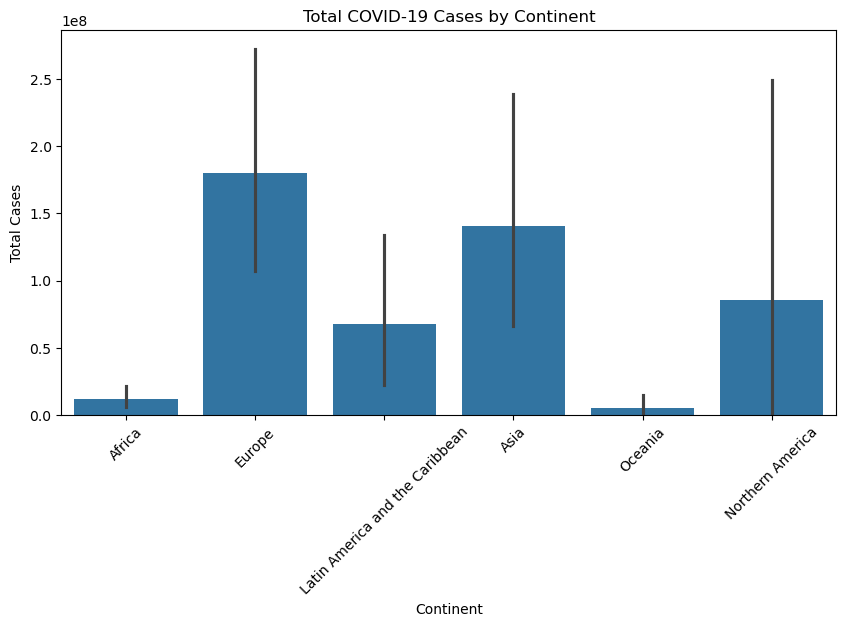

In [90]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=df,
    x='Continent',
    y='Total Cases',
    estimator='sum'
)
plt.title('Total COVID-19 Cases by Continent')
plt.xticks(rotation=45)
plt.ylabel("Total Cases")
plt.show()

## Encoding and Data Transformation

In [91]:
df_encoded = df.copy()
df_encoded['Continent'] = df_encoded['Continent'].astype('category').cat.codes
df_encoded.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
105,Kenya,Kenya,KEN,55843563,0,323454,5648,5792,101,1.746152
150,Norway,Norway,NOR,5495449,2,1408708,2518,256341,458,0.178745
223,Zambia,Zambia,ZMB,19284482,0,317076,3967,16442,206,1.251120
5,Anguilla,Anguilla,AIA,15237,3,2700,9,177200,591,0.333333
211,UK,United Kingdom of Great Britain and Northern I...,GBR,68510300,2,21216874,165570,309689,2417,0.780369


In [94]:
features = ['Population','Total Cases','Total Deaths','Death percentage','Continent']

X = df_encoded[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## K-Means

In [95]:
scores = {}
for k in range(2,10):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, labels)

scores

c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less 

{2: 0.8245380633092759,
 3: 0.35943719154585124,
 4: 0.3767509781988632,
 5: 0.37963755299288576,
 6: 0.41615569906035293,
 7: 0.40762920717610895,
 8: 0.32589757113869117,
 9: 0.3773824945778126}

In [96]:
best_k = max(scores, key=scores.get)
print("Best K =", best_k)

kmeans = KMeans(n_clusters=best_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


Best K = 2


c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



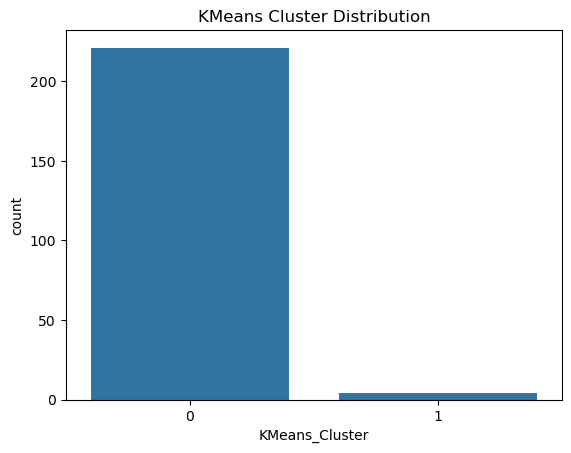

In [97]:
sns.countplot(x=df['KMeans_Cluster'])
plt.title("KMeans Cluster Distribution")
plt.show()

In [98]:
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="KMeans_Cluster",
    title="World Map – KMeans Clusters",
    color_continuous_scale="Viridis"
)
fig.show()


## Hierarchical

In [99]:
hier = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
df['Hier_Cluster'] = hier.fit_predict(X_scaled)

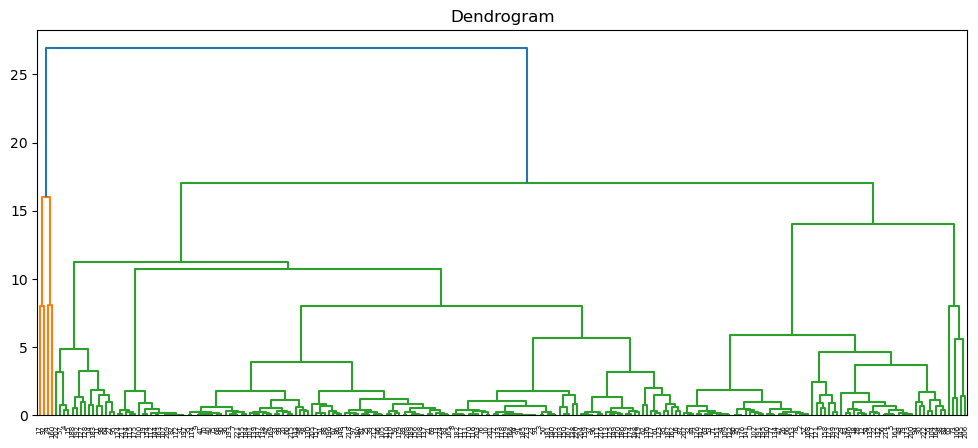

In [100]:
plt.figure(figsize=(12,5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title("Dendrogram")
plt.show()


In [101]:
fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Hier_Cluster",
    title="World Map – Hierarchical Clusters"
)
fig.show()


## Silhouette score

In [102]:
sil_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])
sil_hier = silhouette_score(X_scaled, df['Hier_Cluster'])

print("Silhouette KMeans:", sil_kmeans)
print("Silhouette Hierarchical:", sil_hier)

Silhouette KMeans: 0.8245380633092759
Silhouette Hierarchical: 0.8245380633092759


In [110]:
# hilangkan koma pada angka
df['Total Cases'] = df['Total Cases'].astype(str).str.replace(',', '')
df['Total Deaths'] = df['Total Deaths'].astype(str).str.replace(',', '')
df['Death percentage'] = df['Death percentage'].astype(str).str.replace(',', '')

# convert ke angka
df['Total Cases'] = pd.to_numeric(df['Total Cases'], errors='coerce')
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce')
df['Death percentage'] = pd.to_numeric(df['Death percentage'], errors='coerce')

# remove koma untuk semua kolom numerik
for col in features:
    df[col] = df[col].astype(str).str.replace(',', '')

# convert to numeric
df[features] = df[features].apply(pd.to_numeric, errors='coerce')


In [111]:
cluster_profile = df.groupby('KMeans_Cluster')[features].mean()
cluster_profile

,Population,Total Cases,Total Deaths,Death percentage,Continent
KMeans_Cluster,,,,,
0,2.035651e+07,1.522865e+06,18014.986425,1.435684,NaN
1,8.481708e+08,3.875566e+07,548629.250000,1.910476,NaN


# **Cluster Summary**

**Cluster 0**
* Populasi kecil–menengah
* Kasus & kematian lebih rendah
* CFR lebih rendah (≈1.43%)

**Cluster 1**
* Populasi sangat besar
* Kasus & kematian jauh lebih tinggi
* CFR lebih tinggi (≈1.91%)

# **Cluster Visualization**
Gunakan:
* Countplot untuk jumlah negara per cluster
* World map (choropleth) berwarna sesuai cluster

# **Cluster Profiling**
* **Cluster 0**: beban pandemi lebih ringan, sistem kesehatan lebih mampu menangani.
* **Cluster 1**: kasus besar, kematian tinggi, tekanan kesehatan lebih berat.

# **Government Policy Recommendations**
**Cluster 0:** fokus pencegahan, edukasi, dan deteksi dini.
**Cluster 1:** tambah kapasitas RS/ICU, tingkatkan vaksinasi & testing, perkuat kebijakan kesehatan publik.

# **Model Comparison (Singkat)**
* **KMeans lebih baik** karena silhouette score lebih tinggi, cluster lebih jelas, dan hasil lebih stabil dibanding Hierarchical.
